In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
cab_data = pd.read_csv('cab_rides.csv')
weather_data = pd.read_csv('weather.csv')

In [3]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


# Dependent variables:

Distance - distance between source and destination             
Cab_type - Uber or Lyft                 
Time_stamp - epoch time when data was queried              
Destination - destination of the ride              
Source - the starting point of the ride              
Surge_multiplier - the multiplier by which price was increased, default 1              
Id - unique identifier              
Product_id - uber/lyft identifier for cab-type              
Name - Visible type of the cab eg: Uber Pool, UberXL   

# Target variable:

Price - price estimate for the ride in USD

# Exploratory Data Analysis

In [7]:
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [10]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [11]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [13]:
df = pd.concat([cab_data,weather_data])

In [14]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [15]:
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour

In [18]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [19]:
df.fillna(0,inplace=True)

In [20]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0


In [22]:
df.describe()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,day,hour
count,699347.000000,6.993470e+05,699347.000000,699347.000000,699347.000000,699347.000000,699347.000000,699347.000000,699347.000000,699347.000000,699347.000000,699347.0
mean,2.169782,1.530203e+12,15.093213,1.004771,0.350801,0.006082,9.049874,0.000074,0.006856,0.061049,0.991026,0.0
std,1.152462,1.454683e+11,10.061212,0.132154,3.730327,0.070511,95.109942,0.004148,0.073051,0.728036,0.094306,0.0
min,0.000000,1.543204e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.250000,1.543440e+12,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,2.140000,1.543731e+12,13.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,2.910000,1.544825e+12,22.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,7.860000,1.545161e+12,97.500000,3.000000,55.410000,1.000000,1035.120000,0.780700,0.990000,18.180000,1.000000,0.0


In [24]:
df.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


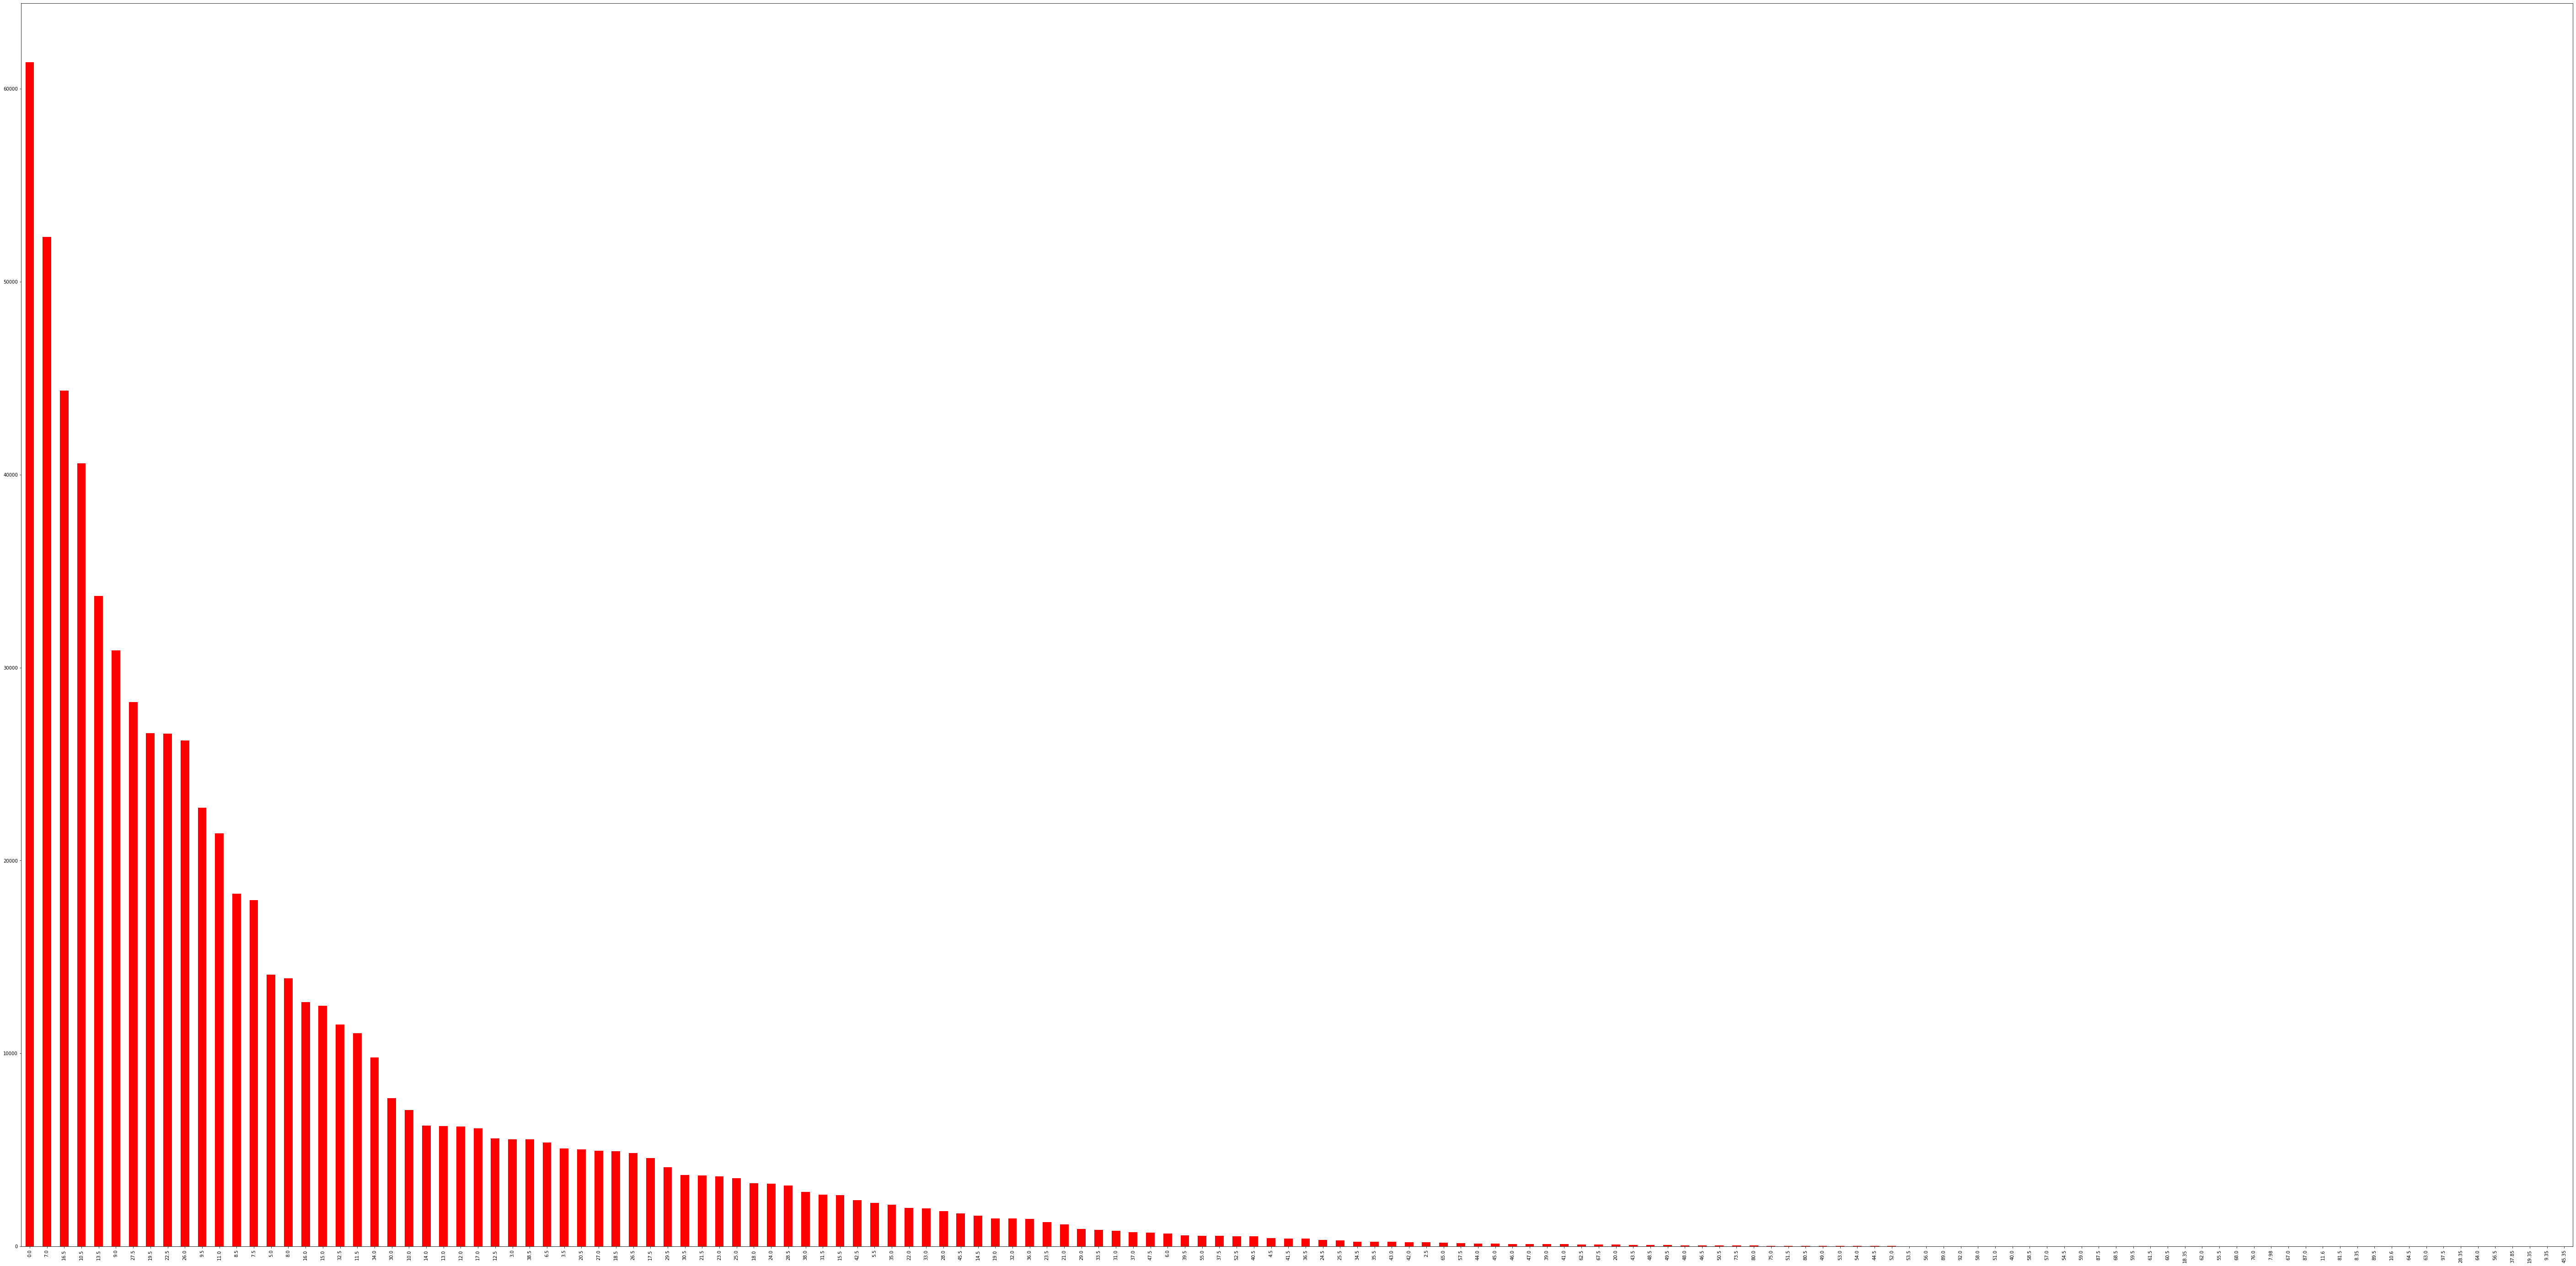

In [30]:
df['price'].value_counts().plot(kind = 'bar', figsize=(100,50), color ='red' )

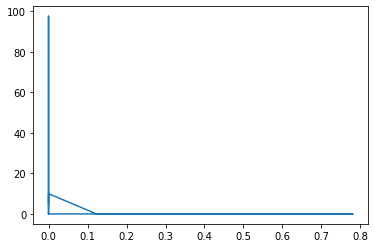

In [34]:
x = df['rain']
y = df['price']
plt.plot(x,y)

# Data Modelling

In [41]:
x1 = df[['distance','hour','surge_multiplier','temp','rain','clouds']]
y1 = df['price']

In [42]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x1,y1, test_size =0.25, random_state =40)


In [44]:
linear = LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [55]:
y_pred = linear.predict(y_train)

In [56]:
df_model = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [57]:
df_model.head(10)

,Actual,Predicted
174255,0.0,10.715145
111245,7.0,17.723925
247864,9.0,15.294890
565307,13.5,13.118879
544902,32.5,15.244285
583969,9.0,12.030873
628802,9.0,13.726137
158987,7.0,17.420296
265367,34.0,16.711827
505032,30.0,17.268481


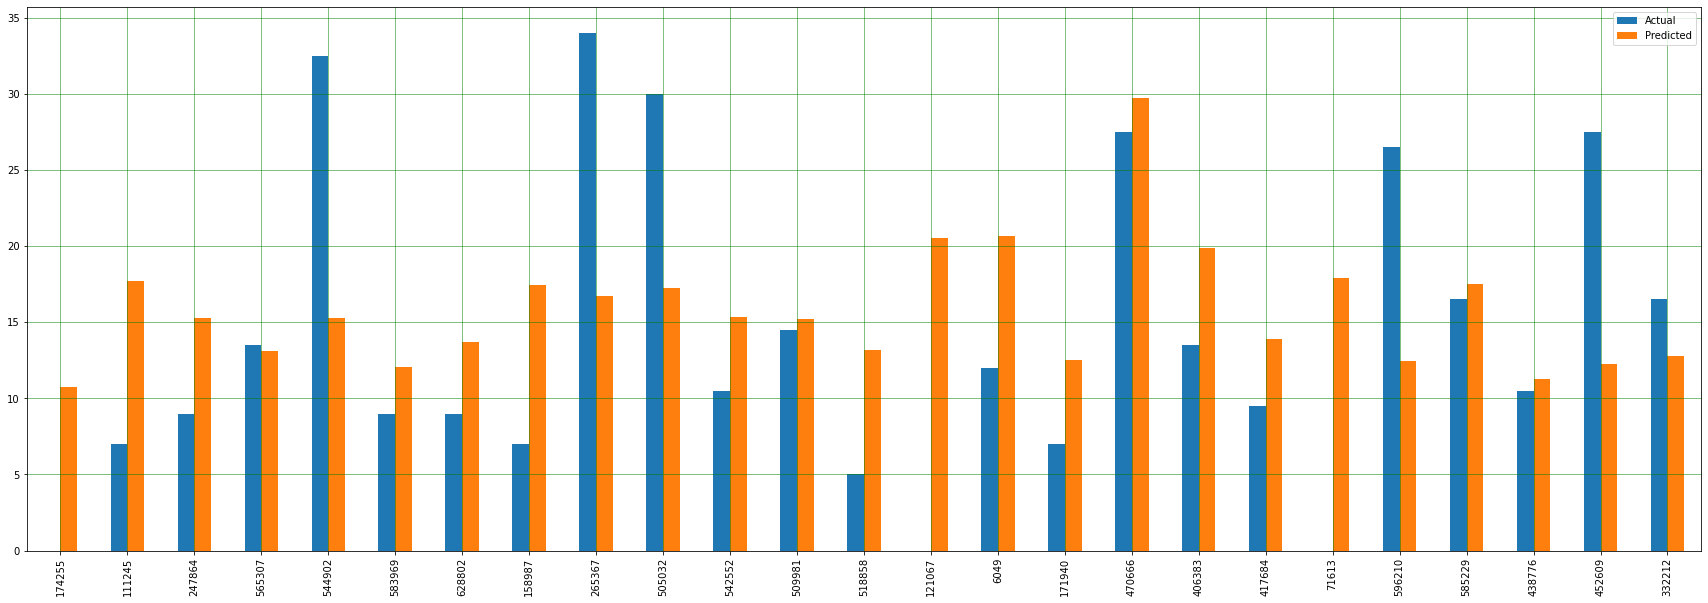

In [58]:
df1 =df_model.head(25)
df1.plot(kind='bar',figsize=(30,10))
plt.grid(which='major',linestyle = '-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle = ':',linewidth='0.5',color='yellow')

In [66]:
from sklearn.metrics import accuracy_score


In [63]:
y_test.shape

(174837,)

In [64]:
y_pred.shape

(174837,)